<h1 style="background-color:white;font-family:rockwell;font-size:300%;text-align:center">Hotel Rating Prediction</h1>

*********************************************************

![](hotel2.jpg)

### Contents
* [**Abstract**](#abstract)
* [**Dataset**](#dataset)
* [**Importing Dataset and the required libraries**](#import)
* [**Feature Engineering and Preprocessing**](#feature)
* [**Part A :: Exploratory Data Analysis**](#eda)
    * [Most searched words using word-cloud](#wordcloud)
    * [Positive Sentiment Distribution](#positive)
    * [Negative Sentiment Distrbution](#negative)
    * [Visualization using Pair Plot](#pairplot)
    * [Visualization using Joint Plot](#jointplot)
    * [Visualization using 3D Scatter Plot](#scatter)
    * [Outlier Removal](#outlier)
* [**Part B :: Prediction Models**](#part-b)
    * [K-Nearest Neighbour Algorithm](#knn)
    * [Decision Tree Classifier](#dtc)
    * [Random Forest Classifier](#rfc)
    * [Gausian NB Algorithm](#gnb)
    * [Logistic Regression](#log)
    * [Support Vector Machine](#svm)
    * [Gradient Boosting Algorithm](#gb)
    * [AdaBoost Algorithm](#ada)
    * [Artificial Neural Network](#ann)
    * [Truncated SVD](#truncated-svd)

* [**Conclusion**](#conclusion)

<a id = 'abstract'></a>
### Abstract
Hotel rating systems are used in almost all countries. The policy makers, managers, and researchers take this process seriously, and contribute in enhancing the system to reflect the needs of the modern traveler. Hotels also invest a lot for getting the desired star ratings. However, at the same time, apart from the guidelines and manuals of the star rating schemes, there is hardly any reliable source of information explaining the principles on which the star rating process is based. The available information can be confusing as different rating systems have different criteria for hotel evaluation. Considering this challenge, this book attempts to bring the star rating process to life through the principles of service quality management because hotel rating systems claim to raise standards of service. Such principles were identified through hundreds of research studies and existing hotel rating systems around the world. This book focusses on making the hotel rating process simple to understand for the benefit of students, managers, and policymakers.

Here to deploy the Hotel Rating Prediction model, I have used nine Machine learning algortihms. The models are fitted succesfully, and at the end all these models are going evaluated based on the accuracy scores.

<a id = 'dataset'></a>
### Dataset
The dataset which is used in this project, is collected from Kaggle. Here is the link of the dataset : https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
from wordcloud import WordCloud,STOPWORDS
stopwords = list(STOPWORDS)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer as CVTZ
def set_seed(seed=31415):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

def RMSE(Y,YHAT):
    return np.sqrt(mean_squared_error(Y,YHAT))

plt.rc('figure',figsize=(20,11))

In [2]:
t_data = pd.read_csv('tripadvisor_hotel_reviews.csv')
t_data.head(3)

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3

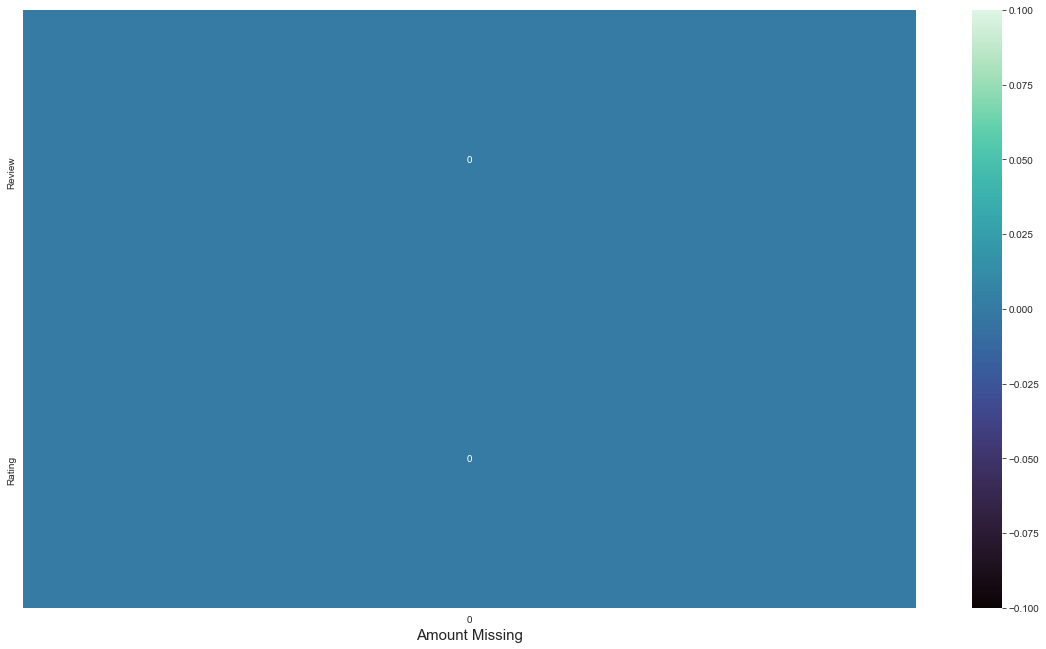

In [3]:
sns.heatmap(t_data.isna().sum().to_frame(),annot=True,cmap='mako')
plt.xlabel('Amount Missing',fontsize=15)
plt.show()

<a id="feature"></a>
### Feature Engineering And Preprocessing
Feature extraction is a process of automatically reducing the dimensionality of these types of observations into a much smaller set that can be modelled.

### Remove Stopwords From Reviews

In [4]:
def remove_stop_words(sir):
    splited = sir.split(' ')
    splited = [word for word in splited if word not in stopwords]
    return ' '.join(splited)

t_data.Review = t_data.Review.apply(remove_stop_words)

In [5]:
sid = SentimentIntensityAnalyzer()

def get_char_count(sir):
    return len(sir)
def get_word_count(sir):
    return len(sir.split(' '))
def get_average_word_length(sir):
    aux = 0
    for word in sir.split(' '):
        aux += len(word)
    return aux/len(sir.split(' '))
def get_pos_sentiment(sir):
    sent = sid.polarity_scores(sir)
    return sent['pos']
def get_neg_sentiment(sir):
    sent = sid.polarity_scores(sir)
    return sent['neg']
def get_neu_sentiment(sir):
    sent = sid.polarity_scores(sir)
    return sent['neu']

In [6]:
t_data['Char_Count'] =  t_data.Review.apply(get_char_count)
t_data['Word_Count'] =  t_data.Review.apply(get_word_count)
t_data['Average_Word_Length'] =  t_data.Review.apply(get_average_word_length)
t_data['Positive_Sentiment'] =   t_data.Review.apply(get_pos_sentiment)
t_data['Negative_Sentiment'] = t_data.Review.apply(get_neg_sentiment)
t_data['Neutral_Sentiment'] =t_data.Review.apply(get_neu_sentiment)

<a id="eda"></a>
## Part A :: Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<a id = 'wordcloud'></a>
### Word Cloud shows most searched words
A word cloud (also known as a tag cloud) is a visual representation of words

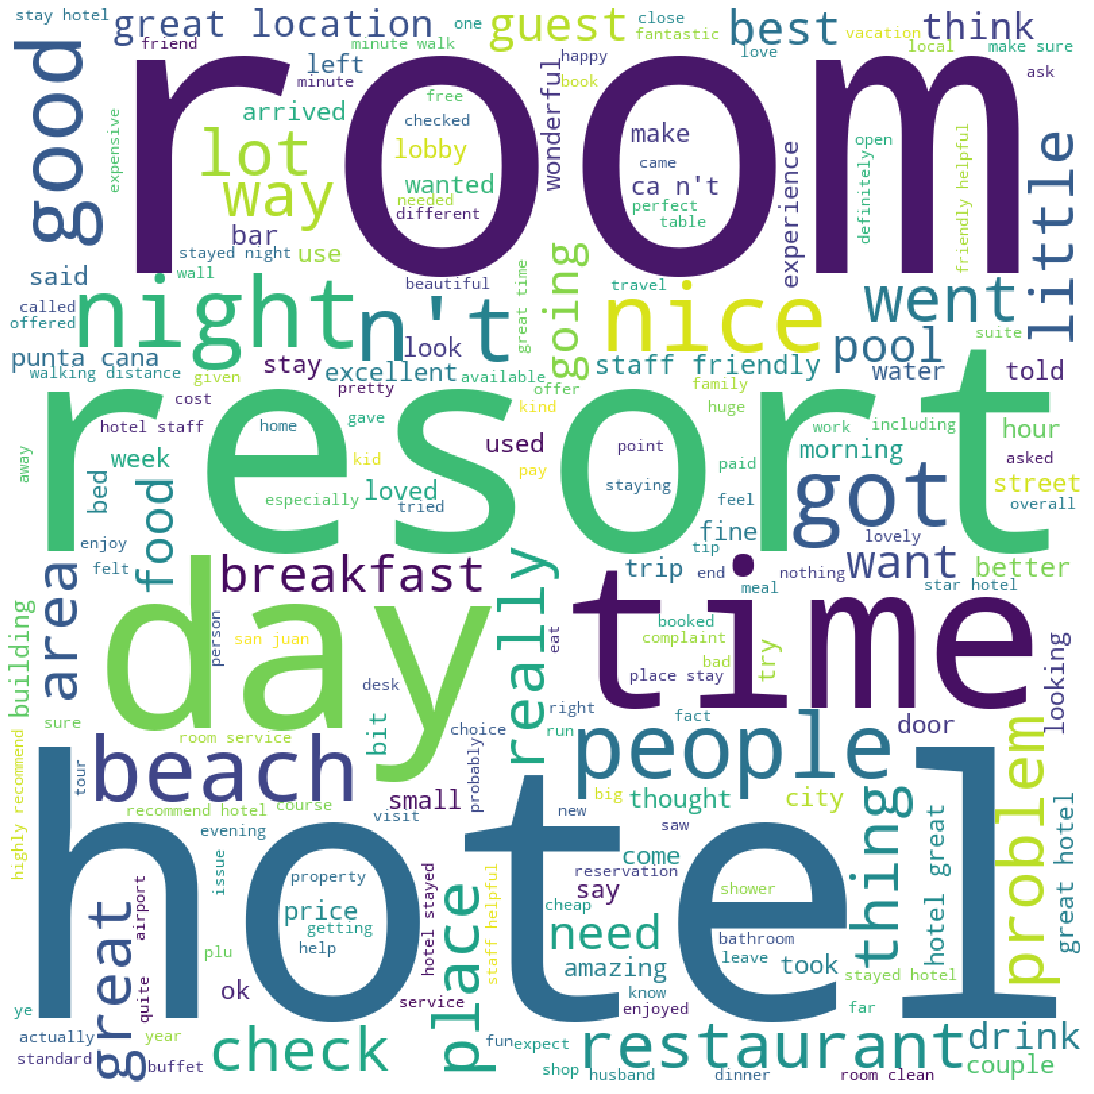

In [7]:
word_list = ''
for word in t_data.Review:
    splited = word.lower()
    word_list +=splited
    
wordcloud = WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,min_font_size=5).generate(word_list)
plt.figure(figsize = (25, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Most searched words for the Hotel Rating System**
1. Resort
2. Hotel
3. night
4. day
5. time

<a id = 'positive'></a>
### Postive Sentiment Distribution

In [8]:
ex.box(t_data,x='Rating',y='Positive_Sentiment',notched=True,title='Rating Positive Sentiment Distributions')

**Insight -1** : We see that the higher the average positive sentiment the higher the rating

<a id = 'negative'></a>
### Negative Sentiment Distribution

In [40]:
ex.box(t_data,x='Rating',y='Negative_Sentiment',notched=True,title='Rating Negative Sentiment Distributions')

**Insight 2** : And not surprisingly the higher the negative sentiment the lower the rating 

<a id = 'pairplot'></a>
### Visualization using Pair plot

Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data. It can also be a great jumping off point for determining types of regression analysis to use.

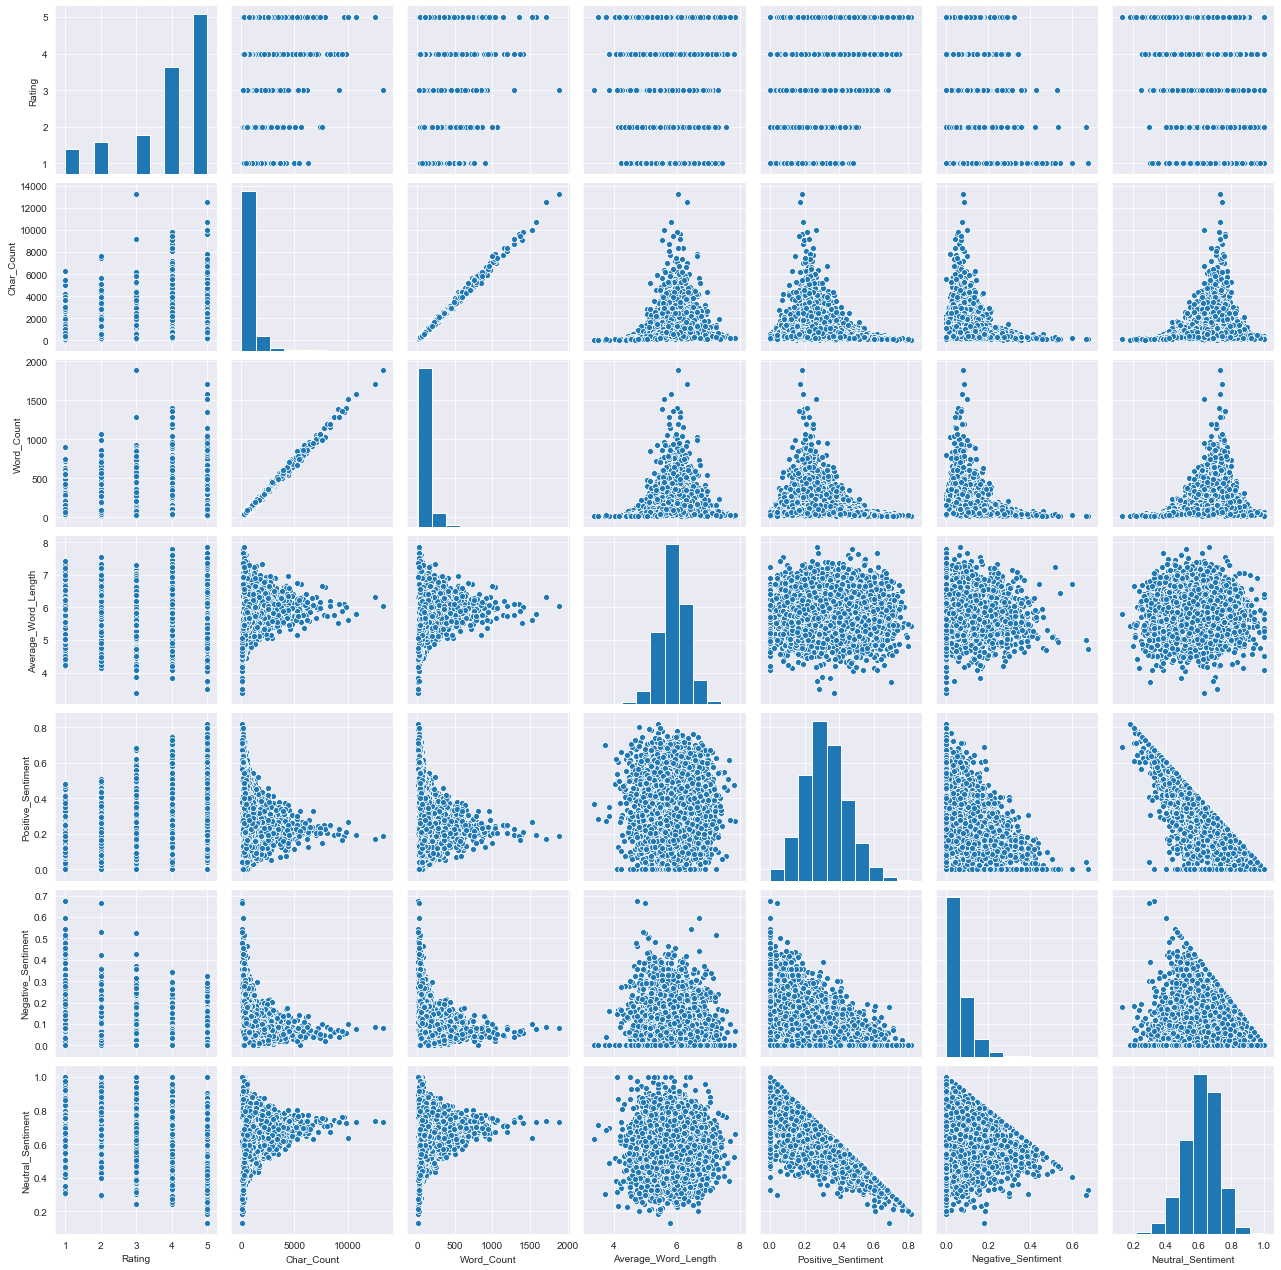

In [10]:
sns.pairplot(t_data)

<a id = 'jointplot'></a>
### Visualization using Joint Grid Plot

Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid. 'hex' bins the data into hexagons with histograms in the margins

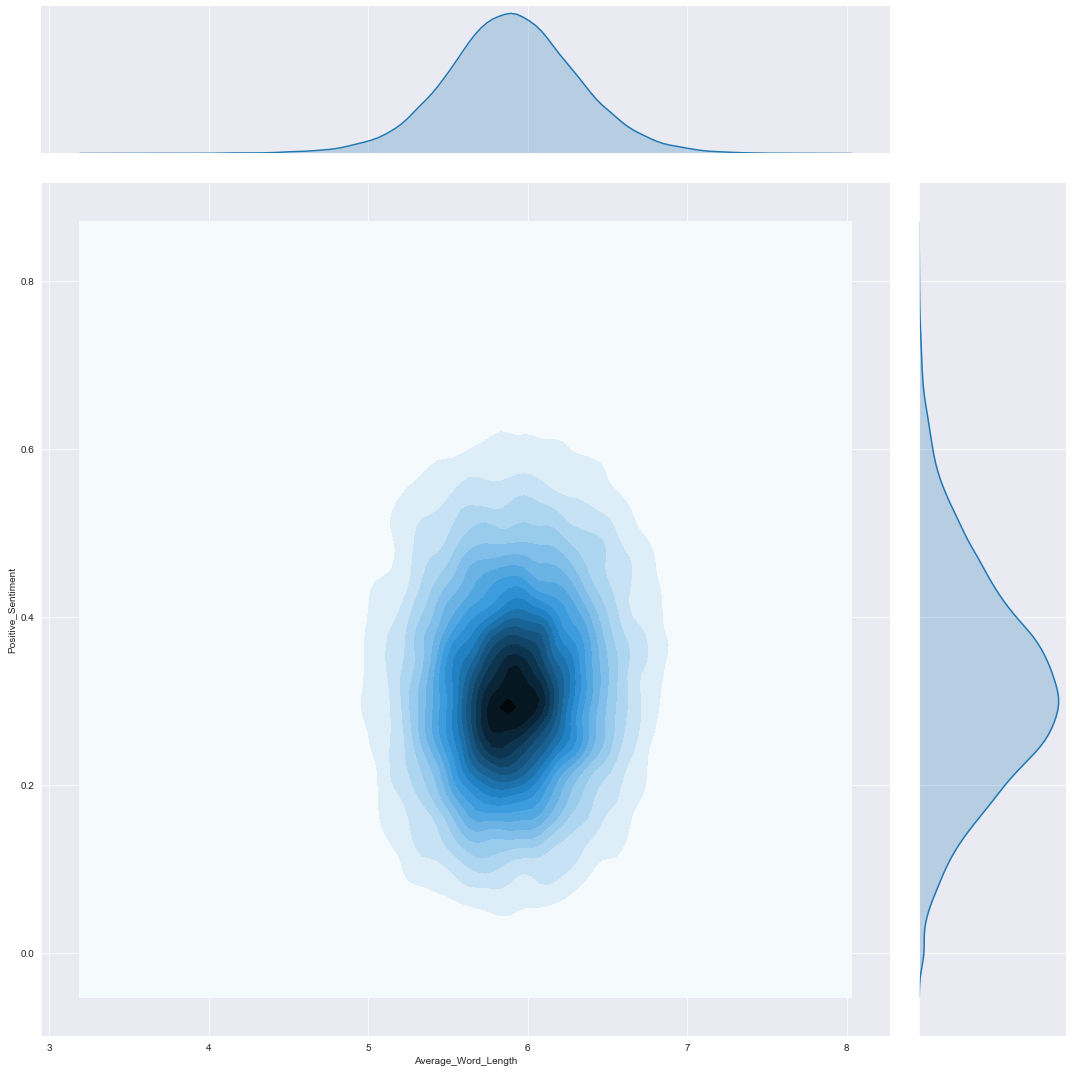

In [11]:
sns.jointplot(x=t_data['Average_Word_Length'],y=t_data['Positive_Sentiment'],height=15,kind='kde',levels=20)

In [12]:
print('Average_Word_Length Skew: ',t_data['Average_Word_Length'].skew(),"  Average_Word_Length Kurtosis",t_data['Average_Word_Length'].kurt())

Average_Word_Length Skew:  -0.08655056161163016   Average_Word_Length Kurtosis 0.8027876931760032


In [13]:
print('Average_Word_Length Mean: ',t_data['Average_Word_Length'].mean(),"  Average_Word_Length Median",t_data['Average_Word_Length'].median(),' Average_Word_Length Mode : ',t_data['Average_Word_Length'].mode()[0])

Average_Word_Length Mean:  5.89684746755551   Average_Word_Length Median 5.896103896103896  Average_Word_Length Mode :  6.0


### The Average_Word_Length Is Approximately Normally Distributed

In [14]:
data_info = t_data.describe()
data_info.loc['skew'] = t_data.skew()
data_info.loc['kurt'] = t_data.kurt()
data_info

Rating    Char_Count    Word_Count  Average_Word_Length  \
count  20491.000000  20491.000000  20491.000000         20491.000000   
mean       3.952223    708.390464    102.460202             5.896847   
std        1.233030    671.642308     96.442340             0.421909   
min        1.000000     40.000000      8.000000             3.363636   
25%        3.000000    333.000000     49.000000             5.633333   
50%        4.000000    525.000000     76.000000             5.896104   
75%        5.000000    841.000000    121.000000             6.164062   
max        5.000000  13300.000000   1886.000000             7.857143   
skew      -1.077219      4.540348      4.524579            -0.086551   
kurt       0.097704     39.659842     39.079857             0.802788   

       Positive_Sentiment  Negative_Sentiment  Neutral_Sentiment  
count        20491.000000        20491.000000       20491.000000  
mean             0.321951            0.060486           0.617564  
std              0.123820            0.060994           0.104610  
min              0.000000            0.000000           0.132000  
25%              0.238000            0.016000           0.553000  
50%              0.315000            0.047000           0.625000  
75%              0.400000            0.087000           0.690000  
max              0.818000            0.673000           1.000000  
skew             0.279520            1.877469          -0.345416  
kurt             0.108593            6.265756           0.375029

<a id = 'scatter'></a>
### 3 dimensional Scatter Plot
3D scatter plots are used to plot data points on three axes in the attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes.

In [15]:
tout_l = t_data.copy()
tout_l['OLL'] = 'Normal'
tout_l.loc[tout_l[tout_l['Word_Count']>1000].index,'OLL']= 'Outlier'
tout_l.loc[tout_l[tout_l['Neutral_Sentiment']<0.25].index,'OLL']= 'Outlier'
tout_l.loc[tout_l[tout_l['Neutral_Sentiment']>0.98].index,'OLL']= 'Outlier'

ex.scatter_3d(tout_l,x='Rating',y='Neutral_Sentiment',z='Word_Count',color='OLL')

<a id = 'outlier'></a>
### Outlier Removal
An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining.

In [16]:
t_data = t_data[t_data['Neutral_Sentiment']>0.25]
t_data = t_data[t_data['Neutral_Sentiment']<0.98]
t_data = t_data[t_data['Word_Count']<1000]

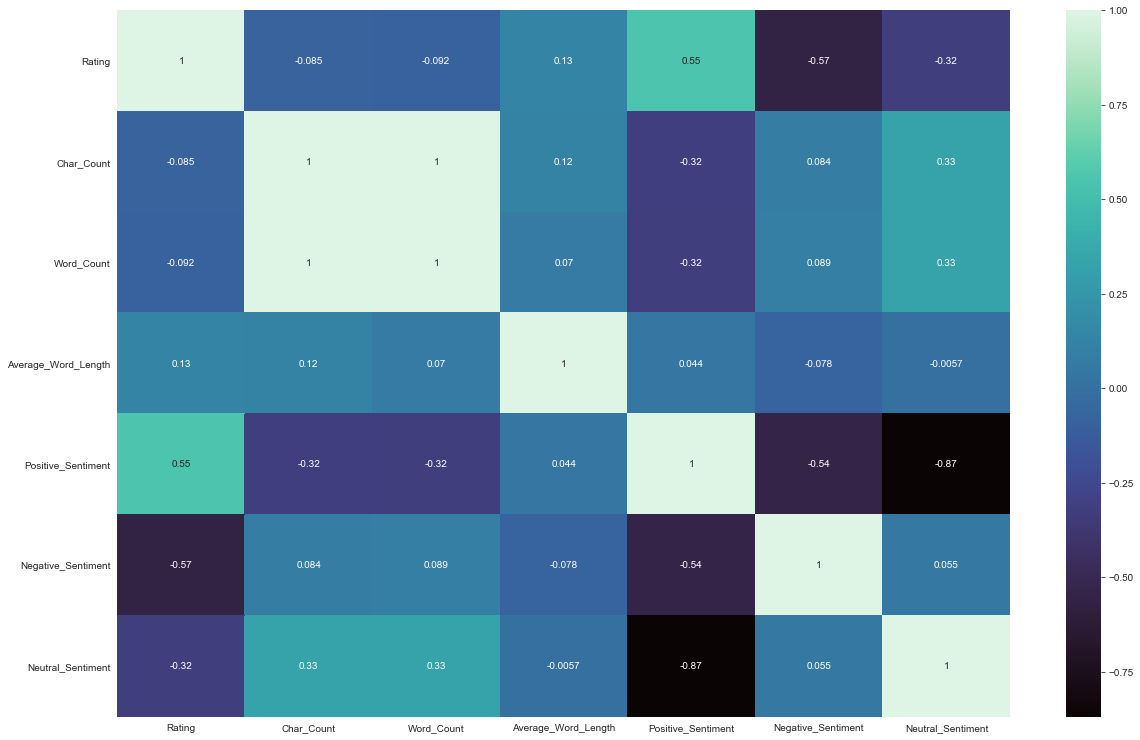

In [17]:
cors = t_data.corr('pearson')
plt.figure(figsize=(20,13))
sns.heatmap(cors,annot=True,cmap='mako')

In [18]:
t_data.head(3)

Review  Rating  Char_Count  \
0  nice hotel expensive parking got good deal sta...       4         560   
1  ok nothing special charge diamond member hilto...       2        1633   
2  nice rooms 4* experience hotel monaco seattle ...       3        1408   

   Word_Count  Average_Word_Length  Positive_Sentiment  Negative_Sentiment  \
0          82             5.841463               0.307               0.057   
1         238             5.865546               0.232               0.054   
2         214             5.584112               0.224               0.074   

   Neutral_Sentiment  
0              0.636  
1              0.714  
2              0.702

<a id="part-b"></a>
## Part B :: Prediction Models
In short, predictive modeling is a statistical technique using machine learning and data mining to predict and forecast likely future outcomes with the aid of historical and existing data. It works by analyzing current and historical data and projecting what it learns on a model generated to forecast likely outcomes.

Here to deploy the Hotel Rating Prediction model, I have used nine Machine learning algortihms. The models are fitted succesfully, and at the end all these models are going evaluated based on the accuracy scores.

We are using nine different classification algorithms -
* **K-Nearest Neighbours Algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


* **Naive Bayes Classifcation Algorithm** :  Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.


* **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


* **Gradient Boosting Algorithm** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **AdaBoosting Algorithm** : AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.


* **Artificial Neural Network** : Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

Let's quickly get into the algorithms!

<a id = 'gnb'></a>
### Gausian Naive Bayes Classifier Algorithm
Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

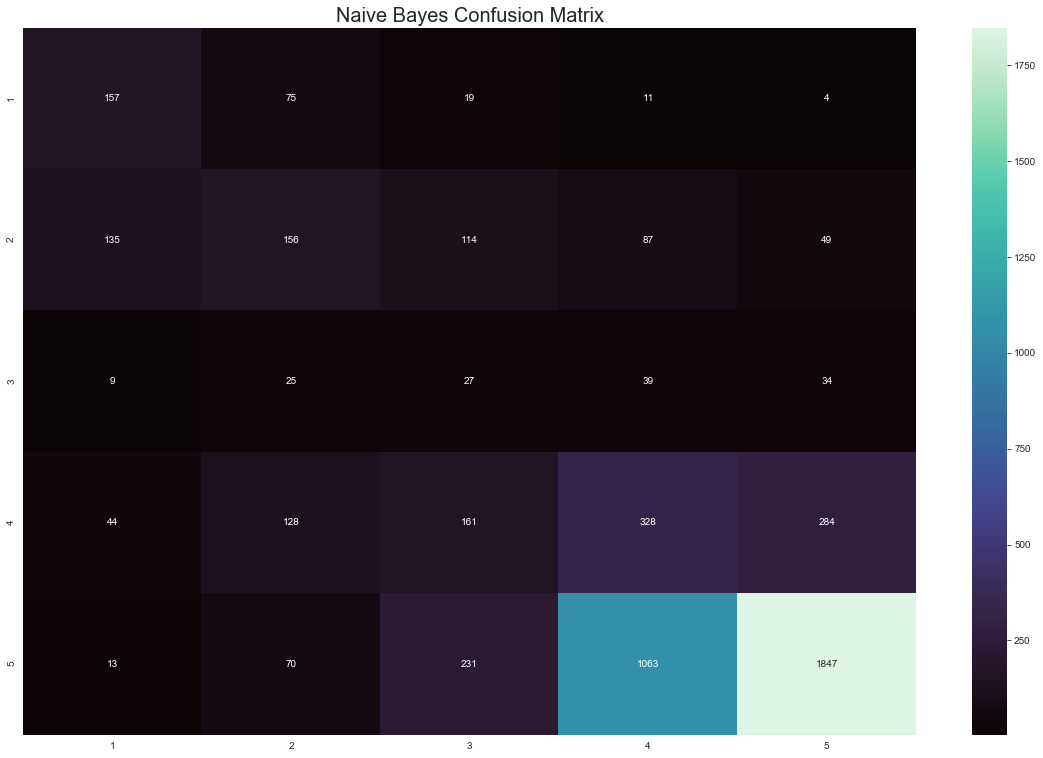

In [19]:
train_x,test_x,train_y,test_y = train_test_split(t_data[['Positive_Sentiment','Negative_Sentiment','Average_Word_Length']],t_data['Rating'])

GN_Pipe = Pipeline(steps=[('model',GaussianNB())])
GN_Pipe.fit(train_x,train_y)
GN_predictions= GN_Pipe.predict(test_x)
#GN_predictions = np.round(LR_predictions)
cfm = confusion_matrix(GN_predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Naive Bayes Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [20]:
print('accuracy: ',accuracy_score (GN_predictions,test_y))

accuracy:  0.49217221135029354


<a id = 'dtc'></a>
### Decision Tree Classifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

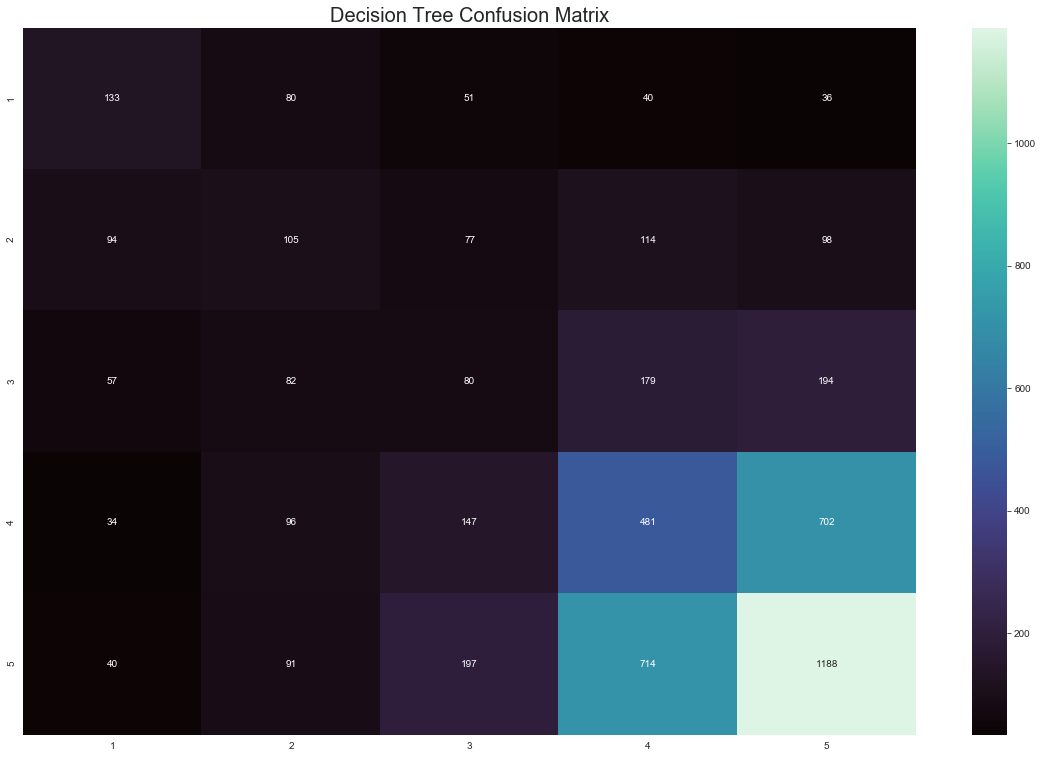

In [21]:
DT_Pipe = Pipeline(steps=[('model',DecisionTreeClassifier())])
DT_Pipe.fit(train_x,train_y)
predictions= DT_Pipe.predict(test_x)
cfm = confusion_matrix(predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Decision Tree Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [22]:
print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.38884540117416827


<a id = 'rfc'></a>
### Random Forest Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

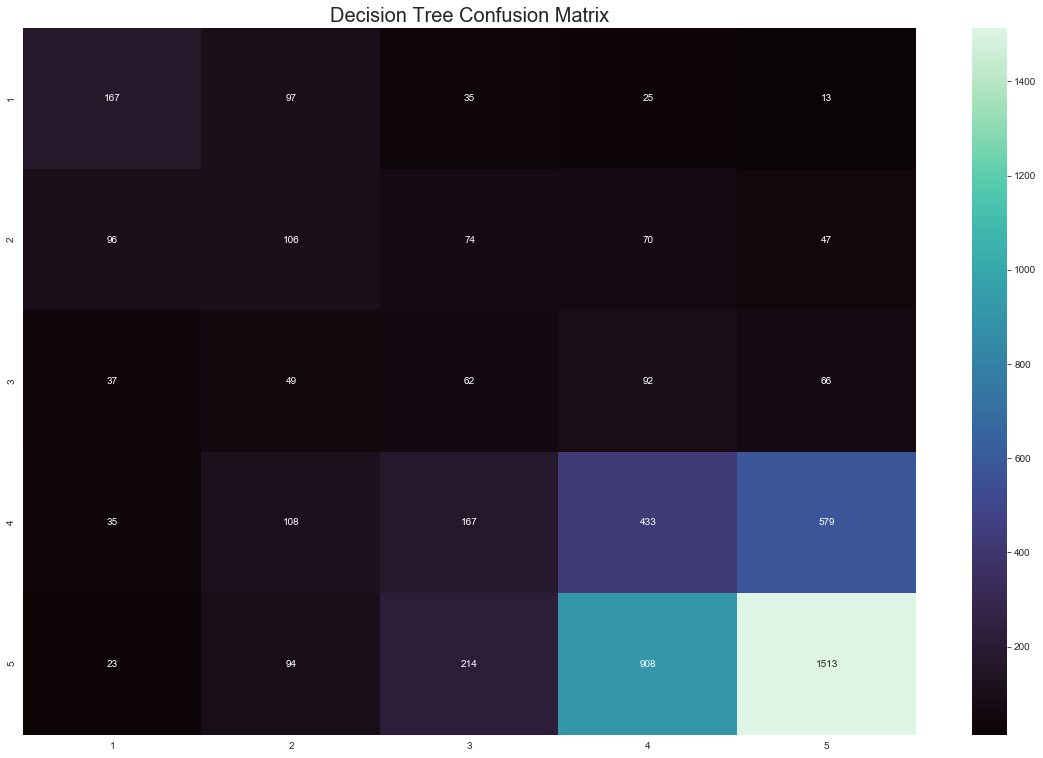

In [24]:
DT_Pipe = Pipeline(steps=[('model',RandomForestClassifier())])
DT_Pipe.fit(train_x,train_y)
predictions= DT_Pipe.predict(test_x)
cfm = confusion_matrix(predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Decision Tree Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [25]:
print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.4463796477495108


<a id = 'log'></a>
### Logistic Regression
 Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

D:\my project\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



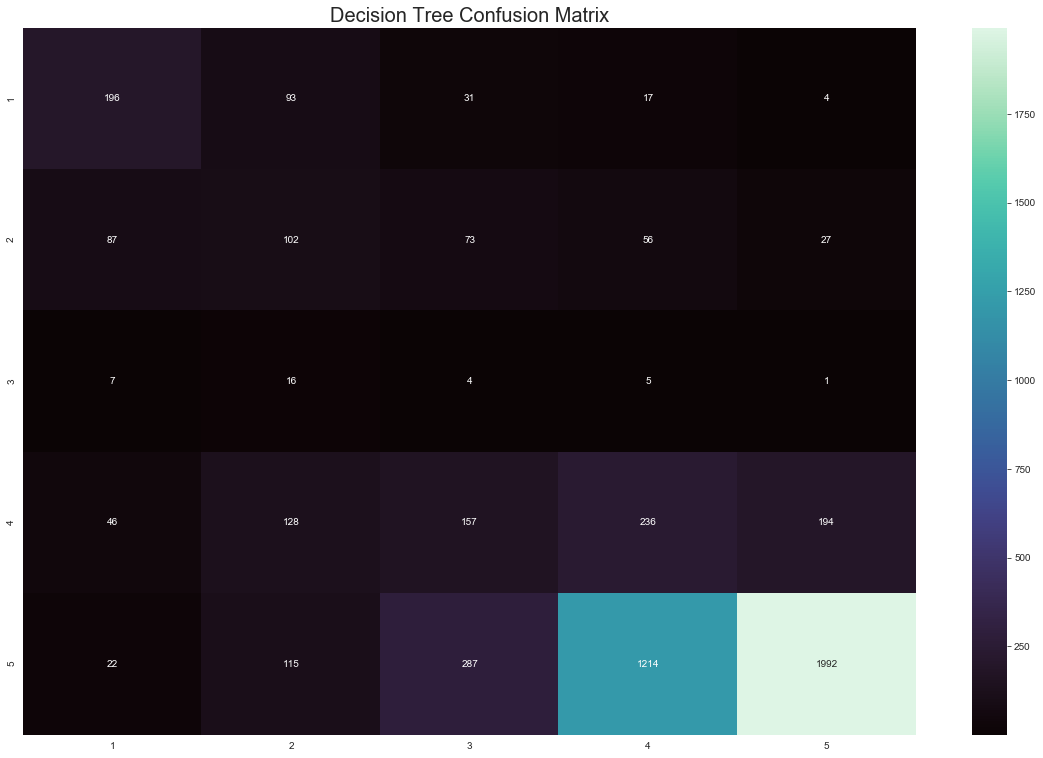

In [26]:
from sklearn.linear_model import LogisticRegression
DT_Pipe = Pipeline(steps=[('model',LogisticRegression())])
DT_Pipe.fit(train_x,train_y)
predictions= DT_Pipe.predict(test_x)
cfm = confusion_matrix(predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Decision Tree Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [27]:
print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.49510763209393344


<a id = "svm"></a>
### SVM Classification
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

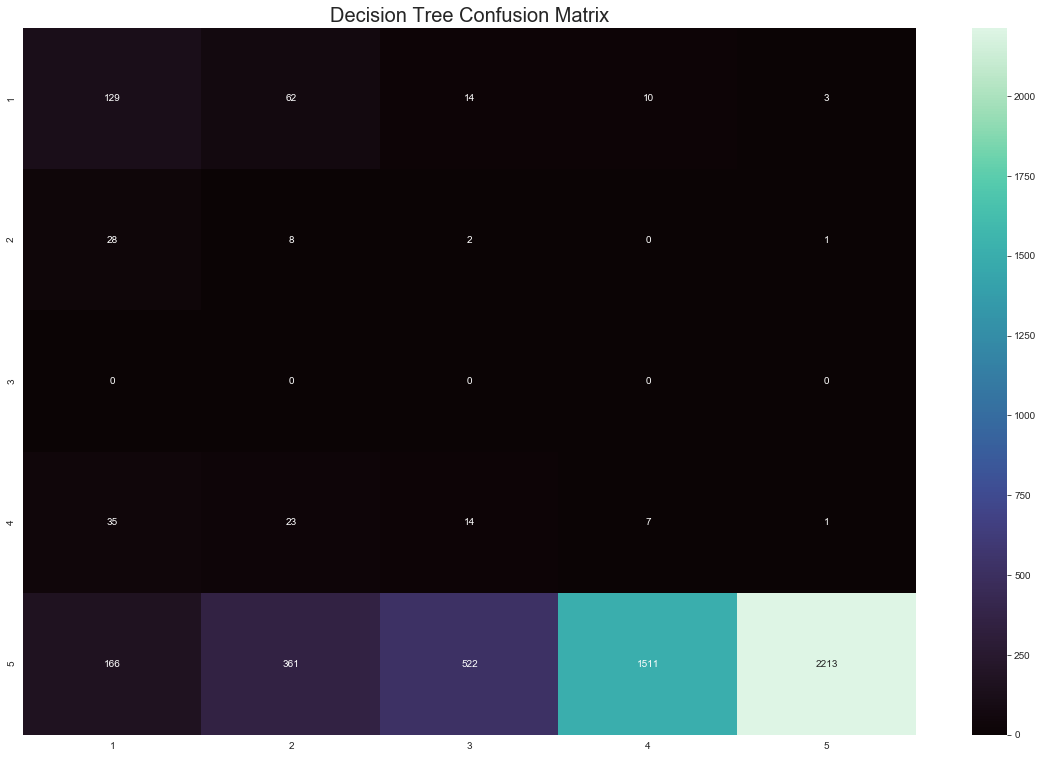

In [28]:
from sklearn.svm import SVC
DT_Pipe = Pipeline(steps=[('model',SVC(random_state=1))])
DT_Pipe.fit(train_x,train_y)
predictions= DT_Pipe.predict(test_x)
cfm = confusion_matrix(predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Decision Tree Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [29]:
print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.46125244618395306


<a id = 'knn'></a>
### K-Nearest Neighbour Algorithm
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

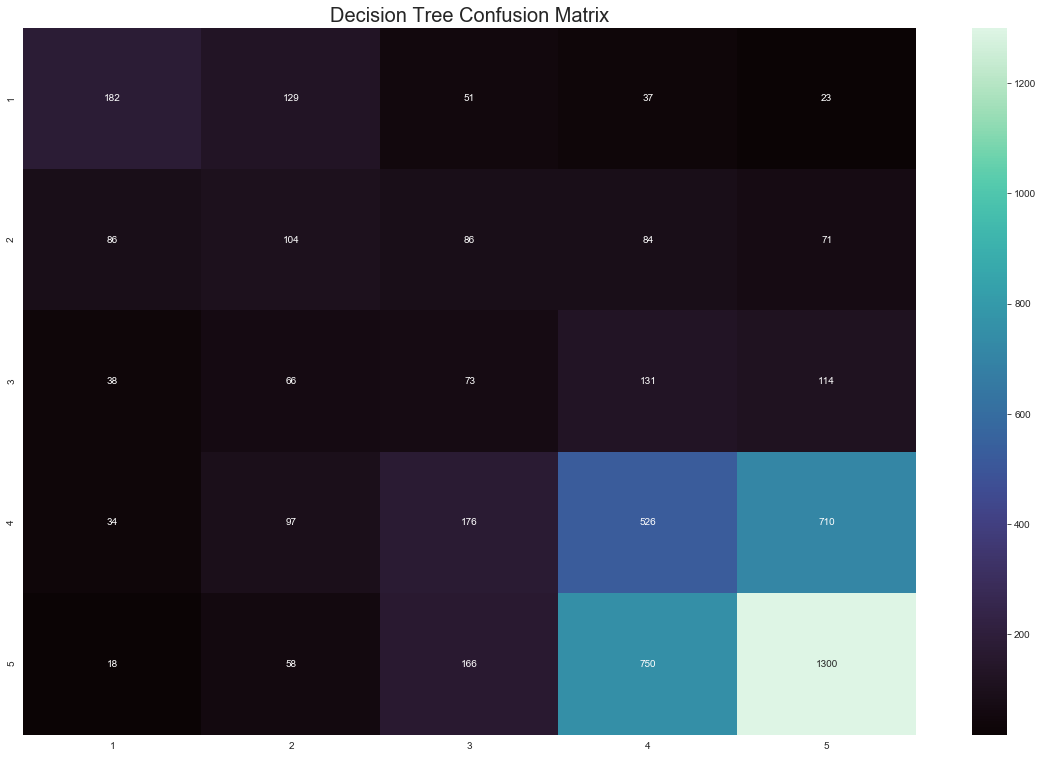

In [31]:
from sklearn.neighbors import KNeighborsClassifier
DT_Pipe = Pipeline(steps=[('model',KNeighborsClassifier(n_neighbors = 6))])
DT_Pipe.fit(train_x,train_y)
predictions= DT_Pipe.predict(test_x)
cfm = confusion_matrix(predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Decision Tree Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [32]:
print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.42759295499021527


In [33]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

<a id = 'gb'></a>
### Gradient Boosting Algorithm
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

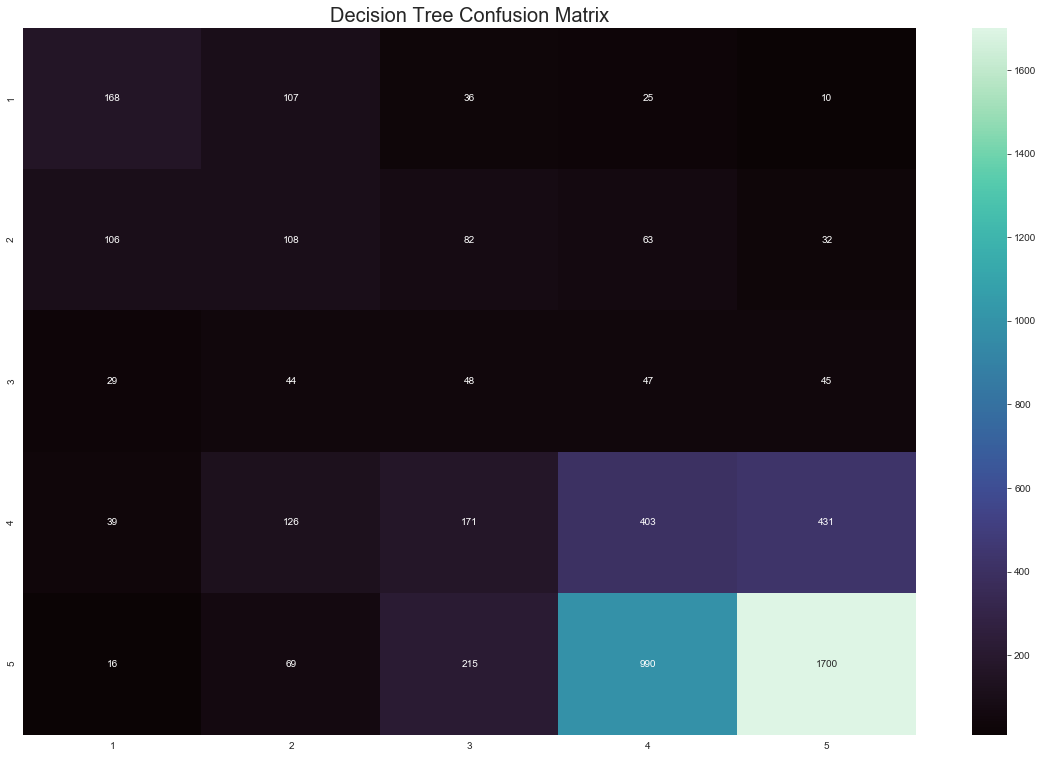

In [34]:
DT_Pipe = Pipeline(steps=[('model',GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5))])
DT_Pipe.fit(train_x,train_y)
predictions= DT_Pipe.predict(test_x)
cfm = confusion_matrix(predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Decision Tree Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [35]:
print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.47495107632093936


<a id = 'ada'></a>
### AdaBoost Algorithm
AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.

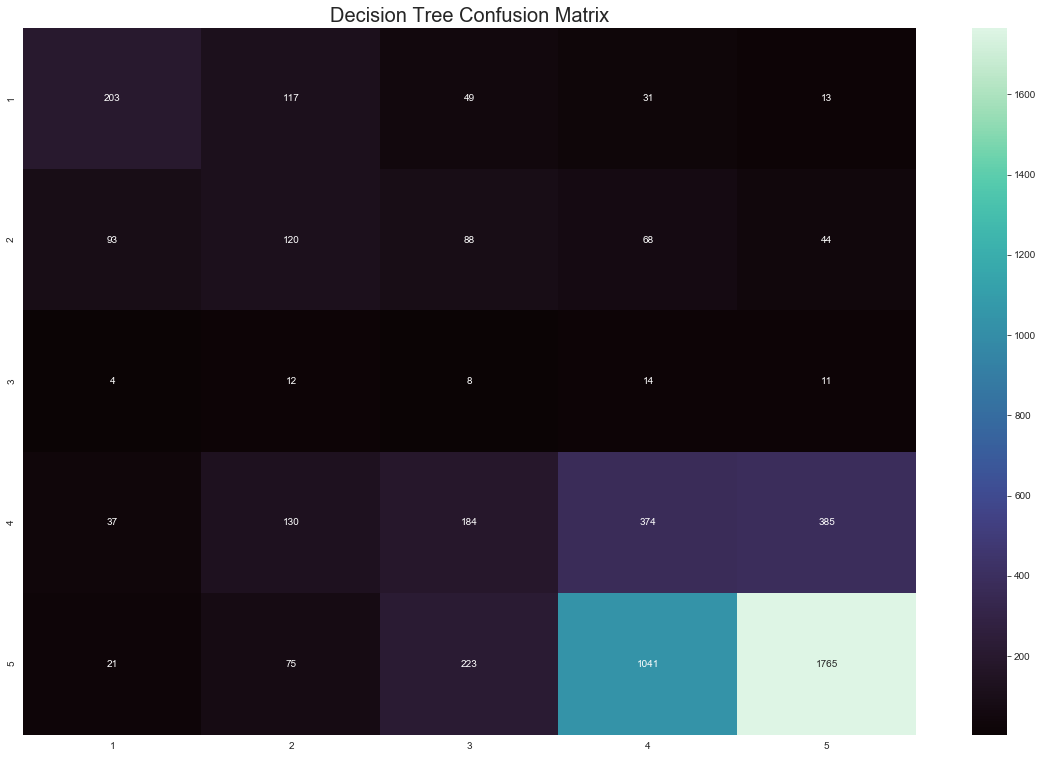

In [36]:
DT_Pipe = Pipeline(steps=[('model',AdaBoostClassifier(n_estimators=100, random_state=0))])
DT_Pipe.fit(train_x,train_y)
predictions= DT_Pipe.predict(test_x)
cfm = confusion_matrix(predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Decision Tree Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [37]:
print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.48336594911937375


<a id = 'ann'></a>
### Artificial Neural Networks Algorithm
Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

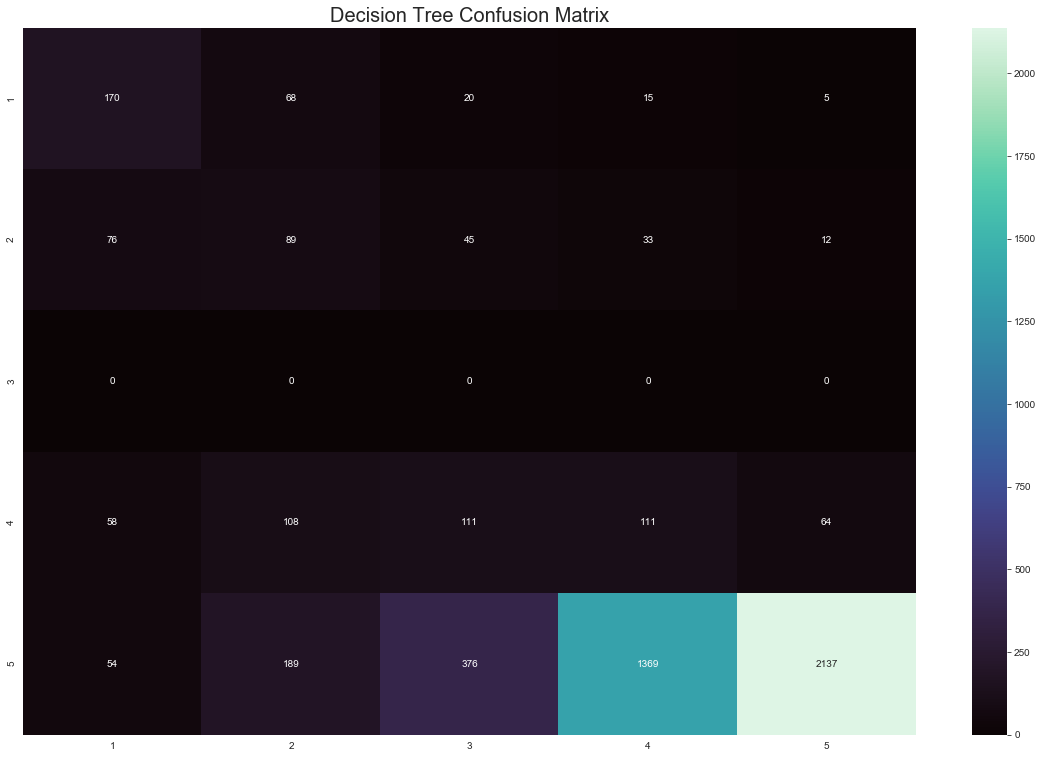

In [38]:
DT_Pipe = Pipeline(steps=[('model',MLPClassifier(alpha=1, max_iter=1000))])
DT_Pipe.fit(train_x,train_y)
predictions= DT_Pipe.predict(test_x)
cfm = confusion_matrix(predictions,test_y)

plt.figure(figsize=(20,13))
plt.title('Decision Tree Confusion Matrix',fontsize=20)
sns.heatmap(cfm,annot=True,cmap='mako',fmt='d',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])

In [39]:
print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.4906066536203523


<a id = 'truncated-svd'></a>
### Truncated SVD
The truncated singular value decomposition (SVD) is considered as a method for regularization of ill-posed linear least squares problems. In particular, the truncated SVD solution is compared with the usual regularized solution. Necessary conditions are defined in which the two methods will yield similar results.

**So far we see that using sentiments and basic text features we have no segnificant results, we will know try our second approch in which we will vectorize our text data and use our naive bayes model again to try and predict a reduced version of the vectorized text.**

In [23]:
tf_model = CVTZ()
N_COMPONENTS = 900

svd_model = TruncatedSVD(n_components = N_COMPONENTS)
desc_matrix = tf_model.fit_transform(t_data.Review)
trunc_matrix = svd_model.fit_transform(desc_matrix)

evr = svd_model.explained_variance_ratio_
evr_cs = np.cumsum(evr)
tr1 = go.Scatter(x=np.arange(0,len(evr_cs)),y=evr_cs,name='Explained Variance Cumulative')
tr2 = go.Scatter(x=np.arange(0,len(evr_cs)),y=evr,name='Explained Variance')

fig = go.Figure(data=[tr1,tr2],layout=dict(title='Explained Variance Ratio Using {} Components'.format(N_COMPONENTS),
                                          xaxis_title='Number Of Components',yaxis_title='Explained Variance Ratio'))

fig.show()


In [24]:
dec_df = pd.DataFrame(trunc_matrix,columns=['PC_{}'.format(i) for i in range(0,900)])
dec_df.head(3)

PC_0      PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  \
0  4.985075 -0.919903  1.629324 -1.285437  1.065172 -1.441146 -3.145457   
1  9.943146 -2.182468  3.712050  0.501770  1.575410  0.277432  1.397337   
2  9.564406 -1.267610  6.124350 -1.817598 -0.965935 -1.059429 -1.518412   

       PC_7      PC_8      PC_9  ...    PC_890    PC_891    PC_892    PC_893  \
0 -0.725605  1.250959 -1.966080  ... -0.063761 -0.001909 -0.111386 -0.130045   
1 -2.636467 -0.391271 -0.753433  ... -0.230420  0.079123 -0.035384  0.014881   
2 -1.781422  2.368542 -0.931492  ...  0.027254 -0.607633  0.119439 -0.304415   

     PC_894    PC_895    PC_896    PC_897    PC_898    PC_899  
0 -0.237312 -0.019029  0.230543 -0.044889 -0.050604  0.077964  
1  0.074651 -0.379294  0.036362  0.191381 -0.018552 -0.168156  
2  0.092850 -0.110903 -0.294698 -0.138051 -0.145878 -0.176916  

[3 rows x 900 columns]

<a id = 'conclusion'></a>
## Conclusion and Comparison
We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Logistic Regression|49.51|
|Decision Tree Classifier|38.88|
|Random Forest Classifier|44.63|
|Naive Bayes Algorithm|49.22|
|KNN Algorithm|42.76|
|Support Vector Machine Algorithm|46.13|
|Gradient Boosting Algorithm|47.49|
|AdaBoosting Classifier|48.34|
|Artificial Neural Network|49.06|

**Comparing all those scores scored by the machine learning algorithms, it is clear that Logistic Regression and Naive Bayes Algorithm are having the upper hand in case of this dataset and after this, we can use ANN, Random Forest Classifier, SVM, Gradient Boosting, AdaBoosting algorithm, which are also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Logistic Regression
2. Gausian Naive Bayes
3. Artificial Neural Network
4. AdaBoosting
5. Gradient Boosting
6. Support Vector Machine
7. Random Forest Classifier
8. K-Nearest Neighbours
9. Decision Tree Classifier


Hooray!! The models are deployed successfully!


### Hope this project will help you! Thank you!